In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:




import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)

# Read the CSV file from the specified directory
file_path = r'D:\data-augmentation-genetics\vcf_with_labels.csv'
df = pd.read_csv(file_path)

# Extract the 'samples' column
samples = df['samples']

# Drop 'samples' and 'score' columns
df = df.drop(columns=['samples', 'score'])

# Display the first 10 rows of the DataFrame
df.head(10)


label  chr22:16050408:T:C  chr22:16050612:C:G  chr22:16050678:C:T  \
0      0                   0                   1                   0   
1      1                   1                   1                   1   
2      0                   1                   1                   1   
3      0                   0                   0                   0   
4      0                   0                   1                   0   
5      1                   1                   1                   1   
6      0                   0                   0                   0   
7      1                   0                   0                   0   
8      1                   0                   0                   0   
9      1                   1                   1                   1   

   chr22:16050984:C:G  chr22:16051107:C:A  chr22:16051249:T:C  \
0                   0                   0                   0   
1                   0                   1                   1   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   1   
6                   0                   0                   0   
7                   0                   0                   1   
8                   0                   0                   0   
9                   0                   1                   1   

   chr22:16051347:G:C  chr22:16051453:A:C  chr22:16051477:C:A  \
0                   0                   0                   0   
1                   1                   1                   0   
2                   1                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   
5                   1                   1                   0   
6                   0                   0                   0   
7                   1                   1                   0   
8                   2                   0                   0   
9                   1                   1                   0   

   chr22:16051480:T:C  chr22:16051497:A:G  chr22:16051722:TA:T  \
0                   0                   0                    0   
1                   1                   1                    0   
2                   1                   1                    0   
3                   0                   1                    0   
4                   1                   1                    0   
5                   1                   1                    0   
6                   0                   0                    0   
7                   0                   1                    0   
8                   0                   2                    0   
9                   1                   1                    0   

   chr22:16051867:T:C  chr22:16051882:C:T  chr22:16052080:G:A  \
0                   0                   0                   1   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   0   
6                   0                   0                   1   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   1                   0   

   chr22:16052112:C:G  chr22:16052159:T:C  chr22:16052239:A:G  \
0                   0                   0                   1   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   1   
4         

In [3]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the number of splits and repeats for RepeatedStratifiedKFold
n_splits = 5  # Number of splits (folds)
n_repeats = 3  # Number of repeats

# Initialize RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=999)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=999)

# Define the list to store metric scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform cross-validation using RepeatedStratifiedKFold
for train_idx, val_idx in cv_method.split(D_test, t_test):
    X_train, X_val = D_test[train_idx], D_test[val_idx]
    y_train, y_val = t_test[train_idx], t_test[val_idx]
    
    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)
    
    # Generate predictions on the validation data
    val_predictions = rf_classifier.predict(X_val)
    
    # Calculate and append metric scores for this fold
    accuracy_scores.append(accuracy_score(y_val, val_predictions))
    precision_scores.append(precision_score(y_val, val_predictions))
    recall_scores.append(recall_score(y_val, val_predictions))
    f1_scores.append(f1_score(y_val, val_predictions))
    roc_auc_scores.append(roc_auc_score(y_val, val_predictions))

# Calculate and display the mean scores for each metric
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-Score:", mean_f1)
print("Mean ROC-AUC:", mean_roc_auc)


Mean Accuracy: 0.5795698924731184
Mean Precision: 0.46142431986085236
Mean Recall: 0.24800000000000005
Mean F1-Score: 0.3186387258733289
Mean ROC-AUC: 0.5258018018018018


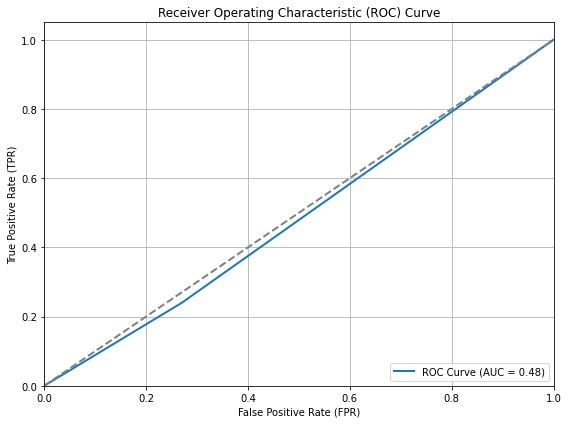

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, val_predictions)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_val, val_predictions)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


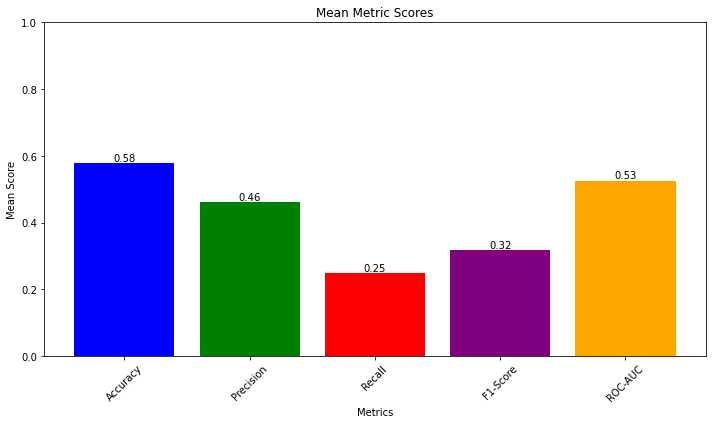

In [6]:
import matplotlib.pyplot as plt

# Define the metric names and their corresponding mean scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
mean_scores = [mean_accuracy, mean_precision, mean_recall, mean_f1, mean_roc_auc]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, mean_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Mean Metric Scores')
plt.ylim(0, 1)  # Set the y-axis limit to the range of 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the scores above the bars
for i, score in enumerate(mean_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


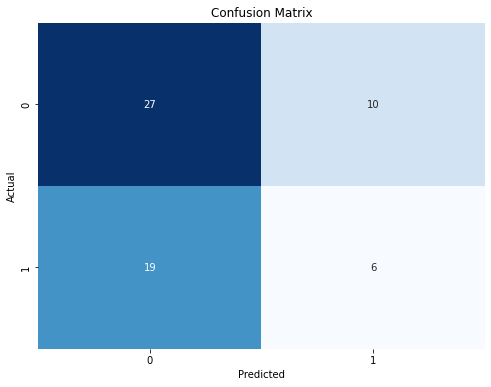

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Create a confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature selection in Cross fold and permorfmance measure

In [8]:
from sklearn.feature_selection import SelectFromModel

# Lists to store cross-validation scores
cv_accuracy_scores = []
cv_precision_scores = []
cv_recall_scores = []
cv_f1_scores = []
cv_roc_auc_scores = []

# Number of top features to select
num_features_to_select = 100

# Perform cross-validation
for train_idx, val_idx in cv_method.split(Data, target):
    # Split the data into training and validation sets for this fold
    X_train, X_val = Data[train_idx], Data[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]

    # Initialize and fit your model (RandomForestClassifier) on the training data
    rf_classifier = RandomForestClassifier(random_state=999)
    
    # Fit the model on the reduced feature set
    feature_selector = SelectFromModel(rf_classifier, max_features=num_features_to_select, prefit=False)
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    X_val_selected = feature_selector.transform(X_val)

    rf_classifier.fit(X_train_selected, y_train)

    # Get the indices of the selected features
    selected_feature_indices = feature_selector.get_support(indices=True)

    # Get the names of the selected features
    selected_feature_names = df.columns[selected_feature_indices]

    # Print the names of the selected features
    print("Top 100 selected feature names:")
    print(selected_feature_names)

   

Top 100 selected feature names:
Index(['chr22:16051480:T:C', 'chr22:16052159:T:C', 'chr22:16052271:G:A',
       'chr22:16052513:G:C', 'chr22:16053509:A:G', 'chr22:16053758:G:A',
       'chr22:16054283:C:T', 'chr22:17674099:C:T', 'chr22:17674283:G:A',
       'chr22:17676414:G:A', 'chr22:17677513:C:T', 'chr22:17683168:C:T',
       'chr22:17685116:C:G', 'chr22:17685509:AAAG:A', 'chr22:17685806:C:T',
       'chr22:17687585:A:G', 'chr22:17692032:A:G', 'chr22:17692504:C:A',
       'chr22:17694780:T:G', 'chr22:17696365:G:A', 'chr22:17696863:G:A',
       'chr22:17697427:C:T', 'chr22:17697438:C:T', 'chr22:17697662:AC:A',
       'chr22:17698080:T:C', 'chr22:17699625:A:G', 'chr22:17700002:G:A',
       'chr22:17701868:C:T', 'chr22:17702642:A:G', 'chr22:17712566:C:T',
       'chr22:17713320:C:G', 'chr22:17714985:C:T', 'chr22:17716985:G:C',
       'chr22:17718084:A:C', 'chr22:17718867:C:T', 'chr22:17719156:G:C',
       'chr22:17719348:A:G', 'chr22:17720152:A:G', 'chr22:17720703:C:T',
       'chr22:1

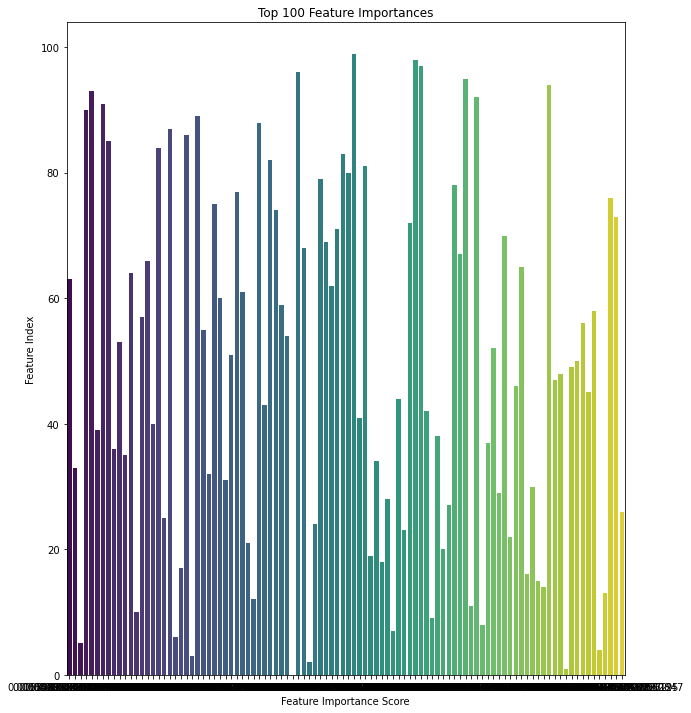

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature importance scores
feature_importance_scores = rf_classifier.feature_importances_
top_100_feature_indices = np.argsort(feature_importance_scores)[::-1][:num_features_to_select]

# Create a horizontal bar plot to visualize the feature importance scores
plt.figure(figsize=(10, 12))
sns.barplot(x=feature_importance_scores[top_100_feature_indices], y=top_100_feature_indices, palette='viridis')
plt.title('Top 100 Feature Importances')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Index')  # Set a generic label for the y-axis
plt.show()


Mean Accuracy (with feature selection): 0.6011756796898206
Mean Precision (with feature selection): 0.5176837835432507
Mean Recall (with feature selection): 0.28398355326066166
Mean F1-Score (with feature selection): 0.3645320836564796
Mean ROC-AUC (with feature selection): 0.550392860641171


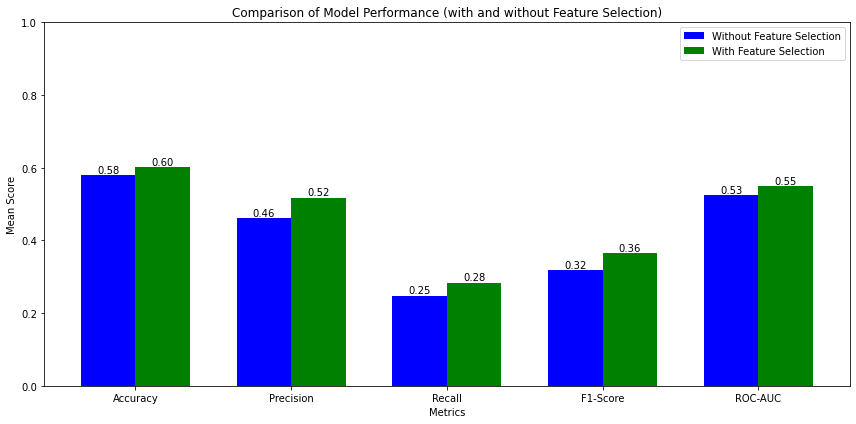

In [10]:
# Perform cross-validation using RepeatedStratifiedKFold
for train_idx, val_idx in cv_method.split(Data, target):
    # Split the data into training and validation sets for this fold
    X_train, X_val = Data[train_idx], Data[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]

    # Initialize and fit your model (RandomForestClassifier) on the training data
    rf_classifier = RandomForestClassifier(random_state=999)
    
    # Fit the model on the reduced feature set
    feature_selector = SelectFromModel(rf_classifier, max_features=num_features_to_select, prefit=False)
    X_train_selected = feature_selector.fit_transform(X_train, y_train)
    X_val_selected = feature_selector.transform(X_val)

    rf_classifier.fit(X_train_selected, y_train)

    # Generate predictions on the validation data
    val_predictions = rf_classifier.predict(X_val_selected)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_val, val_predictions)
    precision = precision_score(y_val, val_predictions)
    recall = recall_score(y_val, val_predictions)
    f1 = f1_score(y_val, val_predictions)
    roc_auc = roc_auc_score(y_val, val_predictions)

    # Append the scores to their respective lists
    cv_accuracy_scores.append(accuracy)
    cv_precision_scores.append(precision)
    cv_recall_scores.append(recall)
    cv_f1_scores.append(f1)
    cv_roc_auc_scores.append(roc_auc)

# Calculate and print the mean scores for each metric with feature selection
mean_accuracy_with_fs = np.mean(cv_accuracy_scores)
mean_precision_with_fs = np.mean(cv_precision_scores)
mean_recall_with_fs = np.mean(cv_recall_scores)
mean_f1_with_fs = np.mean(cv_f1_scores)
mean_roc_auc_with_fs = np.mean(cv_roc_auc_scores)

print("Mean Accuracy (with feature selection):", mean_accuracy_with_fs)
print("Mean Precision (with feature selection):", mean_precision_with_fs)
print("Mean Recall (with feature selection):", mean_recall_with_fs)
print("Mean F1-Score (with feature selection):", mean_f1_with_fs)
print("Mean ROC-AUC (with feature selection):", mean_roc_auc_with_fs)

# Create a bar chart to compare the two models
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
scores_without_feature_selection = [mean_accuracy, mean_precision, mean_recall, mean_f1, mean_roc_auc]
scores_with_feature_selection = [mean_accuracy_with_fs, mean_precision_with_fs, mean_recall_with_fs, mean_f1_with_fs, mean_roc_auc_with_fs]

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, scores_without_feature_selection, bar_width, label='Without Feature Selection', color='blue')
plt.bar([i + bar_width for i in index], scores_with_feature_selection, bar_width, label='With Feature Selection', color='green')

plt.xlabel('Metrics')
plt.ylabel('Mean Score')
plt.title('Comparison of Model Performance (with and without Feature Selection)')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()
plt.ylim(0, 1)

# Display the scores above the bars for both models
for i, score in enumerate(scores_without_feature_selection):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_with_feature_selection):
    plt.text(i + bar_width, score, f'{score:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a further simplified parameter grid
param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=999)

# Initialize the GridSearchCV with 3-fold cross-validation (reduce folds for speed)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Now you can use the best model (best_rf_classifier) for evaluation


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [15]:
from sklearn.model_selection import GridSearchCV

# Define an extended parameter grid with wider search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=999)

# Initialize the GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Now you can use the best model (best_rf_classifier) for evaluation



Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [17]:
# Model without Feature Selection Metrics
mean_accuracy_no_fs = 0.5796
mean_precision_no_fs = 0.4614
mean_recall_no_fs = 0.2480
mean_f1_no_fs = 0.3186
mean_roc_auc_no_fs = 0.5258

# Model with Feature Selection Metrics
mean_accuracy_with_fs = 0.6012
mean_precision_with_fs = 0.5177
mean_recall_with_fs = 0.2840
mean_f1_with_fs = 0.3645
mean_roc_auc_with_fs = 0.5504

# Model after Hyperparameter Tuning Metrics (replace with actual values)
accuracy_tuned = best_rf_classifier.score(X_val_selected, y_val)  # Replace with actual accuracy
precision_tuned = precision_score(y_val, best_rf_classifier.predict(X_val_selected))  # Replace with actual precision
recall_tuned = recall_score(y_val, best_rf_classifier.predict(X_val_selected))  # Replace with actual recall
f1_tuned = f1_score(y_val, best_rf_classifier.predict(X_val_selected))  # Replace with actual F1-score
roc_auc_tuned = roc_auc_score(y_val, best_rf_classifier.predict(X_val_selected))  # Replace with actual ROC-AUC

# Print and compare the metrics
print("Metrics Comparison:")
print("Model without Feature Selection:")
print("Mean Accuracy:", mean_accuracy_no_fs)
print("Mean Precision:", mean_precision_no_fs)
print("Mean Recall:", mean_recall_no_fs)
print("Mean F1-Score:", mean_f1_no_fs)
print("Mean ROC-AUC:", mean_roc_auc_no_fs)

print("\nModel with Feature Selection:")
print("Mean Accuracy:", mean_accuracy_with_fs)
print("Mean Precision:", mean_precision_with_fs)
print("Mean Recall:", mean_recall_with_fs)
print("Mean F1-Score:", mean_f1_with_fs)
print("Mean ROC-AUC:", mean_roc_auc_with_fs)

print("\nModel after Hyperparameter Tuning:")
print("Accuracy (Tuned):", accuracy_tuned)
print("Precision (Tuned):", precision_tuned)
print("Recall (Tuned):", recall_tuned)
print("F1-Score (Tuned):", f1_tuned)
print("ROC-AUC (Tuned):", roc_auc_tuned)


Metrics Comparison:
Model without Feature Selection:
Mean Accuracy: 0.5796
Mean Precision: 0.4614
Mean Recall: 0.248
Mean F1-Score: 0.3186
Mean ROC-AUC: 0.5258

Model with Feature Selection:
Mean Accuracy: 0.6012
Mean Precision: 0.5177
Mean Recall: 0.284
Mean F1-Score: 0.3645
Mean ROC-AUC: 0.5504

Model after Hyperparameter Tuning:
Accuracy (Tuned): 0.5776699029126213
Precision (Tuned): 0.4473684210526316
Recall (Tuned): 0.20481927710843373
F1-Score (Tuned): 0.2809917355371901
ROC-AUC (Tuned): 0.5170437848956801


In [24]:
from sklearn.metrics import classification_report

# Generate classification report for the tuned model
classification_report_tuned = classification_report(y_val, best_rf_classifier.predict(X_val_selected), target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report for Model after Hyperparameter Tuning:")
print(classification_report_tuned)


Classification Report for Model after Hyperparameter Tuning:
              precision    recall  f1-score   support

     Class 0       0.61      0.83      0.70       123
     Class 1       0.45      0.20      0.28        83

    accuracy                           0.58       206
   macro avg       0.53      0.52      0.49       206
weighted avg       0.54      0.58      0.53       206



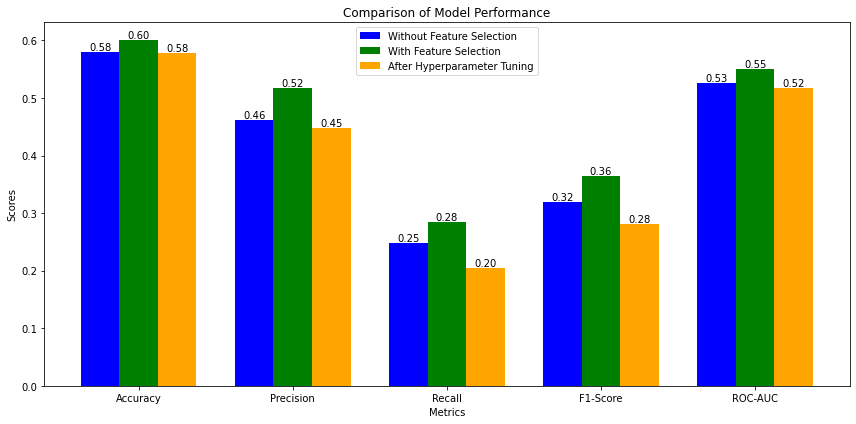

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their corresponding scores for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
scores_no_fs = [mean_accuracy_no_fs, mean_precision_no_fs, mean_recall_no_fs, mean_f1_no_fs, mean_roc_auc_no_fs]
scores_with_fs = [mean_accuracy_with_fs, mean_precision_with_fs, mean_recall_with_fs, mean_f1_with_fs, mean_roc_auc_with_fs]
scores_tuned = [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned, roc_auc_tuned]

# Create an index for the metrics
index = np.arange(len(metrics))
bar_width = 0.25

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index - bar_width, scores_no_fs, bar_width, label='Without Feature Selection', color='blue')
bar2 = ax.bar(index, scores_with_fs, bar_width, label='With Feature Selection', color='green')
bar3 = ax.bar(index + bar_width, scores_tuned, bar_width, label='After Hyperparameter Tuning', color='orange')

# Label the axes and titl
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display the scores above the bars
for i, score in enumerate(scores_no_fs):
    ax.text(i - bar_width, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_with_fs):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_tuned):
    ax.text(i + bar_width, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Hyper param tuning on feature selection 

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=999)

# Create a feature selector with max_features set to 100
feature_selector = SelectFromModel(rf_classifier, max_features=100)

# Transform the training data with feature selection
X_train_selected = feature_selector.fit_transform(D_train, t_train)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to your data with feature selection
grid_search.fit(X_train_selected, t_train)

# Get the best hyperparameters
best_params_with_fs = grid_search.best_params_

# Get the best model with feature selection
best_rf_classifier_with_fs = grid_search.best_estimator_

# Transform the validation data with feature selection
X_val_selected = feature_selector.transform(D_test)

# Evaluate the tuned model with feature selection on the validation data
val_predictions_with_hfs = best_rf_classifier_with_fs.predict(X_val_selected)
# Print the name of the model with feature selection and hyperparameter tuning
model_name_with_hfs = "Model_with_Feature_Selection_and_Hyperparameter_Tuning"

# Calculate evaluation metrics for the tuned model with feature selection
accuracy_hyperparam_with_fs = accuracy_score(t_test, val_predictions_with_hfs)
precision_hyperparam_with_fs = precision_score(t_test, val_predictions_with_hfs)
recall_hyperparam_with_fs = recall_score(t_test, val_predictions_with_hfs)
f1_hyperparam_with_fs = f1_score(t_test, val_predictions_with_hfs)
roc_auc_hyperparam_with_fs = roc_auc_score(t_test, val_predictions_with_hfs)

# Print and compare the evaluation metrics with the new names
print("\nEvaluation Metrics for", model_name_with_hfs, ":")
print("Accuracy:", accuracy_hyperparam_with_fs)
print("Precision:", precision_hyperparam_with_fs)
print("Recall:", recall_hyperparam_with_fs)
print("F1-Score:", f1_hyperparam_with_fs)
print("ROC-AUC:", roc_auc_hyperparam_with_fs)

# You can now use 'best_rf_classifier_with_fs' for further predictions or save it as needed.



Evaluation Metrics for Model_with_Feature_Selection_and_Hyperparameter_Tuning :
Accuracy: 0.567741935483871
Precision: 0.44155844155844154
Recall: 0.272
F1-Score: 0.33663366336633666
ROC-AUC: 0.5197837837837838


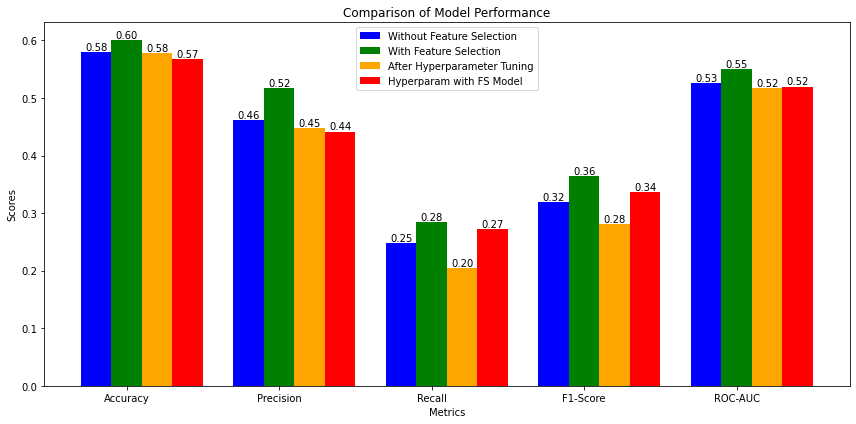

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their corresponding scores for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
scores_no_fs = [mean_accuracy_no_fs, mean_precision_no_fs, mean_recall_no_fs, mean_f1_no_fs, mean_roc_auc_no_fs]
scores_with_fs = [mean_accuracy_with_fs, mean_precision_with_fs, mean_recall_with_fs, mean_f1_with_fs, mean_roc_auc_with_fs]
scores_hyperparam_with_fs = [accuracy_hyperparam_with_fs, precision_hyperparam_with_fs, recall_hyperparam_with_fs, f1_hyperparam_with_fs, roc_auc_hyperparam_with_fs]

# Create an index for the metrics
index = np.arange(len(metrics))
bar_width = 0.2

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index - bar_width, scores_no_fs, bar_width, label='Without Feature Selection', color='blue')
bar2 = ax.bar(index, scores_with_fs, bar_width, label='With Feature Selection', color='green')
bar3 = ax.bar(index + bar_width, scores_tuned, bar_width, label='After Hyperparameter Tuning', color='orange')
bar4 = ax.bar(index + 2*bar_width, scores_hyperparam_with_fs, bar_width, label='Hyperparam with FS Model', color='red')

# Label the axes and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display the scores above the bars
for i, score in enumerate(scores_no_fs):
    ax.text(i - bar_width, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_with_fs):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_tuned):
    ax.text(i + bar_width, score, f'{score:.2f}', ha='center', va='bottom')
for i, score in enumerate(scores_hyperparam_with_fs):
    ax.text(i + 2*bar_width, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Mix up Algo in data augmentation 

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the mixup function
def mixup(X, y, alpha=0.2):
    """
    Perform mixup augmentation on the dataset.

    Parameters:
    - X: Features of the dataset.
    - y: Labels of the dataset.
    - alpha: Mixing coefficient (default is 0.2).

    Returns:
    - X_mixup: Mixed features.
    - y_mixup: Mixed labels.
    """
    m = X.shape[0]  # Number of samples
    indices = np.random.permutation(m)
    
    X_mixup = []
    y_mixup = []
    
    for i in range(m):
        lam = np.random.beta(alpha, alpha)
        index1 = indices[i]
        index2 = indices[(i + 1) % m]  # Wrap around for the last sample
        mixed_X = lam * X[index1] + (1 - lam) * X[index2]
        X_mixup.append(mixed_X)
        y_mixup.append(lam * y[index1] + (1 - lam) * y[index2])
    
    return np.array(X_mixup), np.array(y_mixup)

# Read your CSV file
file_path = r'D:\data-augmentation-genetics\vcf_with_labels.csv'
df = pd.read_csv(file_path)

# Extract the 'samples' column
samples = df['samples']

# Drop 'samples' and 'score' columns
df = df.drop(columns=['samples', 'score'])

target = df.label.values
Data = df.drop(columns='label').values

# Split the data into training and testing sets
D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size=0.3, random_state=999, stratify=target)

# Perform mixup augmentation on the training data
D_train_mixup, t_train_mixup = mixup(D_train, t_train)

# Ensure that the mixed labels are in categorical form (round to the nearest integer)
t_train_mixup = np.round(t_train_mixup).astype(int)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=999)

# Fit the model on the training data (use mixed data)
rf_classifier.fit(D_train_mixup, t_train_mixup)

# Make predictions on the test data
test_predictions = rf_classifier.predict(D_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(t_test, test_predictions)

print("Accuracy on Test Data:", accuracy)


Accuracy on Test Data: 0.5709677419354838


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Make predictions on the test data
test_predictions = rf_classifier.predict(D_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(t_test, test_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(t_test, test_predictions)
recall = recall_score(t_test, test_predictions)
f1 = f1_score(t_test, test_predictions)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(t_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(t_test, test_predictions))

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
[[141  44]
 [ 89  36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68       185
           1       0.45      0.29      0.35       125

    accuracy                           0.57       310
   macro avg       0.53      0.53      0.52       310
weighted avg       0.55      0.57      0.55       310

Accuracy: 0.5709677419354838
Precision: 0.45
Recall: 0.288
F1-Score: 0.35121951219512193


<Figure size 576x432 with 0 Axes>

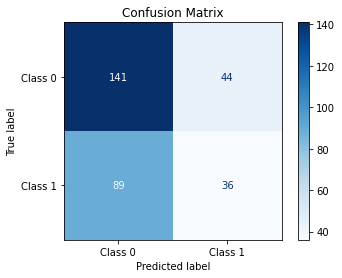

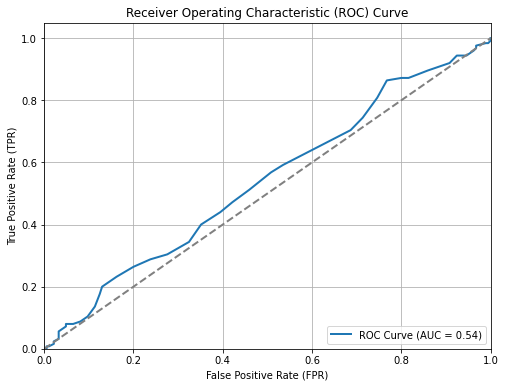

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, roc_curve, roc_auc_score

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(rf_classifier, D_test, t_test, cmap=plt.cm.Blues, display_labels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(t_test, rf_classifier.predict_proba(D_test)[:, 1])

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(t_test, rf_classifier.predict_proba(D_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
